In [104]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import math
import scipy

sns.set(style='white')

In [105]:
data = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=3, 
                           n_clusters_per_class=1)

In [106]:
X, Y = data

In [107]:
X.T[0].shape

(200,)

In [108]:
Y = Y.reshape((200, 1))

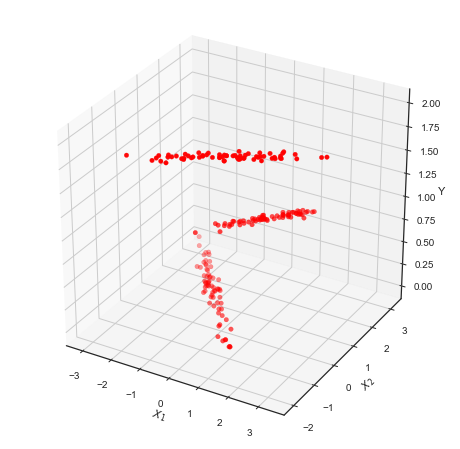

In [109]:
# Plot our data
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.T[0], X.T[1], Y, c='r');
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('Y');

In [110]:
X_with_ones = np.hstack((np.ones((X.shape[0], 1)) ,X))
X_train, X_test, Y_train, Y_test = train_test_split(X_with_ones, Y, train_size=0.7, shuffle=True)

/usr/local/lib64/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [111]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
print(accuracy_score(model.predict(X_test), Y_test))

0.9


/usr/local/lib64/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
def softmax(theta):
    """
    Returns a vector, the softmax of the vector eta.
    """
    exps = np.exp(theta - np.max(theta))
    return exps / np.sum(exps, axis=0)

In [113]:
# Get initial theta values randomly
theta = np.random.randn(3, 3)  # k x (n + 1)

In [114]:
def grad_nll(x, y, p, theta, lambd):
    """
    Returns the gradient of the negative log-likelihood function w.r.t theta_p.
    
    Args:
        x: (m, n + 1) matrix
        y: (m, 1) vector
        theta: (k, n+1) matrix
    """
    m = x.shape[0]
    n = x.shape[1]
    
    cur_sum = np.zeros(n, dtype=np.float64)
    for i in range(m):
        cur_sum += x[i] * ((y[i] == p) - softmax(np.dot(theta, x[i].T))[p])
    
    return -cur_sum / m + lambd * theta[p]

In [115]:
def gradient_descent(theta, x, y, iterations=1000, it_print=100, alpha=0.01, lambd=1):
    """
    Performs gradient descent.
    
    Args:
        theta: (n + 1, k) vector
        x: (m, n+1) vector
        y: (m, 1) vector
        iterations: number of iterations to perform
        it_print: number of iterations to print loss after
        alpha: learning rate
        lambda: regularization parameter
        
    """
    m = x.shape[0]
    n = x.shape[1]
    k = theta.shape[1]
    
    for i in range(iterations):
        grad = np.array([])
        for p in range(k):
            grad = np.append(grad, grad_nll(x, y, p, theta, lambd))
        grad = grad.reshape(theta.shape)
        theta -= alpha * grad
        
    return theta

In [116]:
theta = gradient_descent(theta, X_train, Y_train, iterations=300, alpha=0.1)

In [117]:
X_test.shape, Y_test.shape, theta.shape

((60, 3), (60, 1), (3, 3))

In [118]:
probabilities = softmax(np.dot(X_test, theta))

In [119]:
predictions = np.argmax(probabilities, axis=1)

In [120]:
predictions = predictions.reshape((60, 1))

In [121]:
Y_test.shape

(60, 1)

In [122]:
predictions.shape

(60, 1)

In [123]:
right_predictions = np.sum(Y_test == predictions)

In [124]:
print('Accuracy = {0}'.format(right_predictions / len(predictions)))

Accuracy = 0.8833333333333333
